# Data Analysis

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import dataframe_image as dfi

### EX1: Single Effect Classification

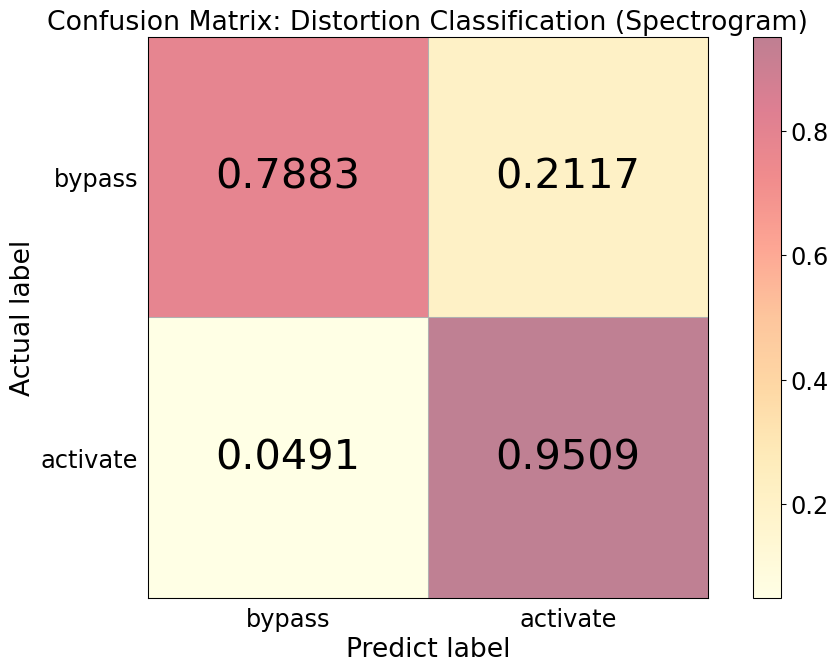

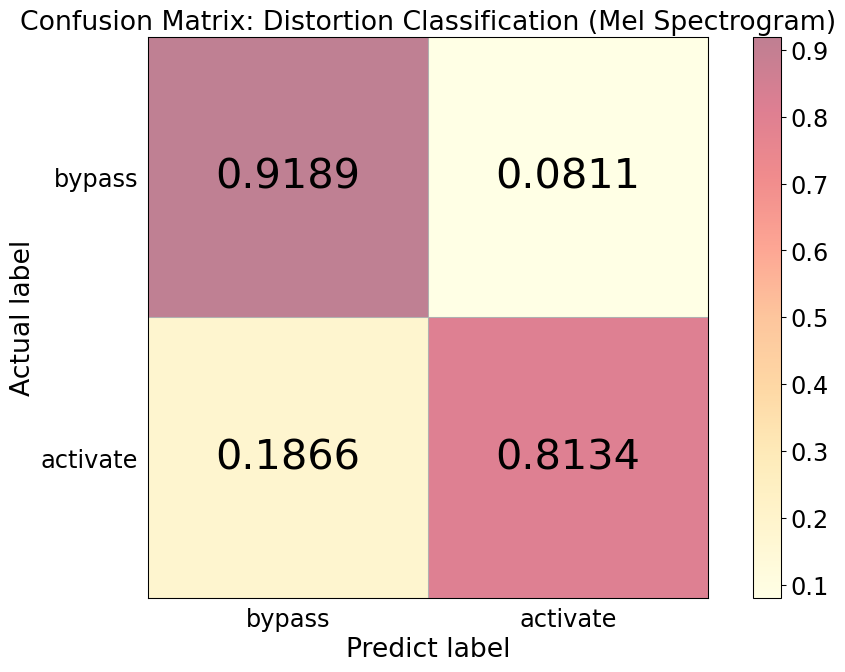

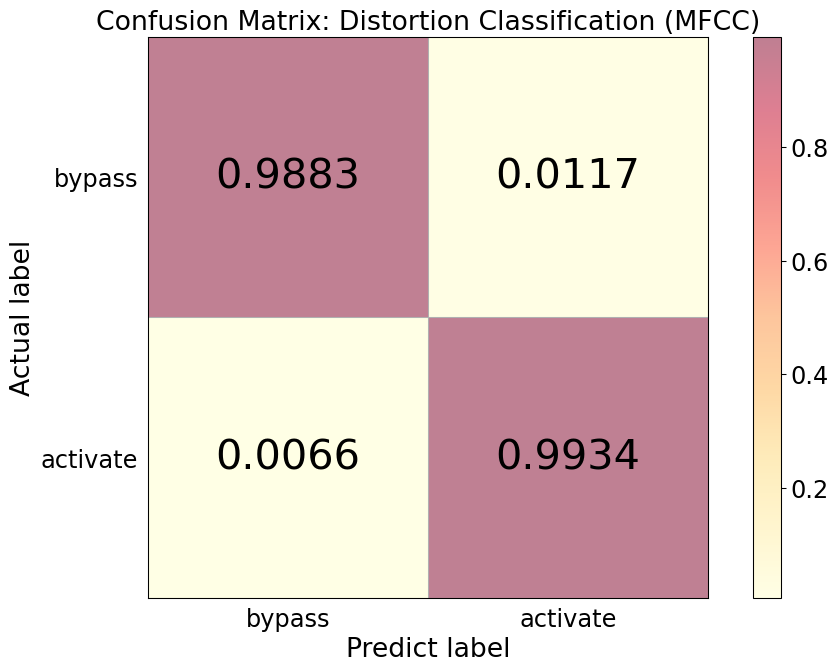

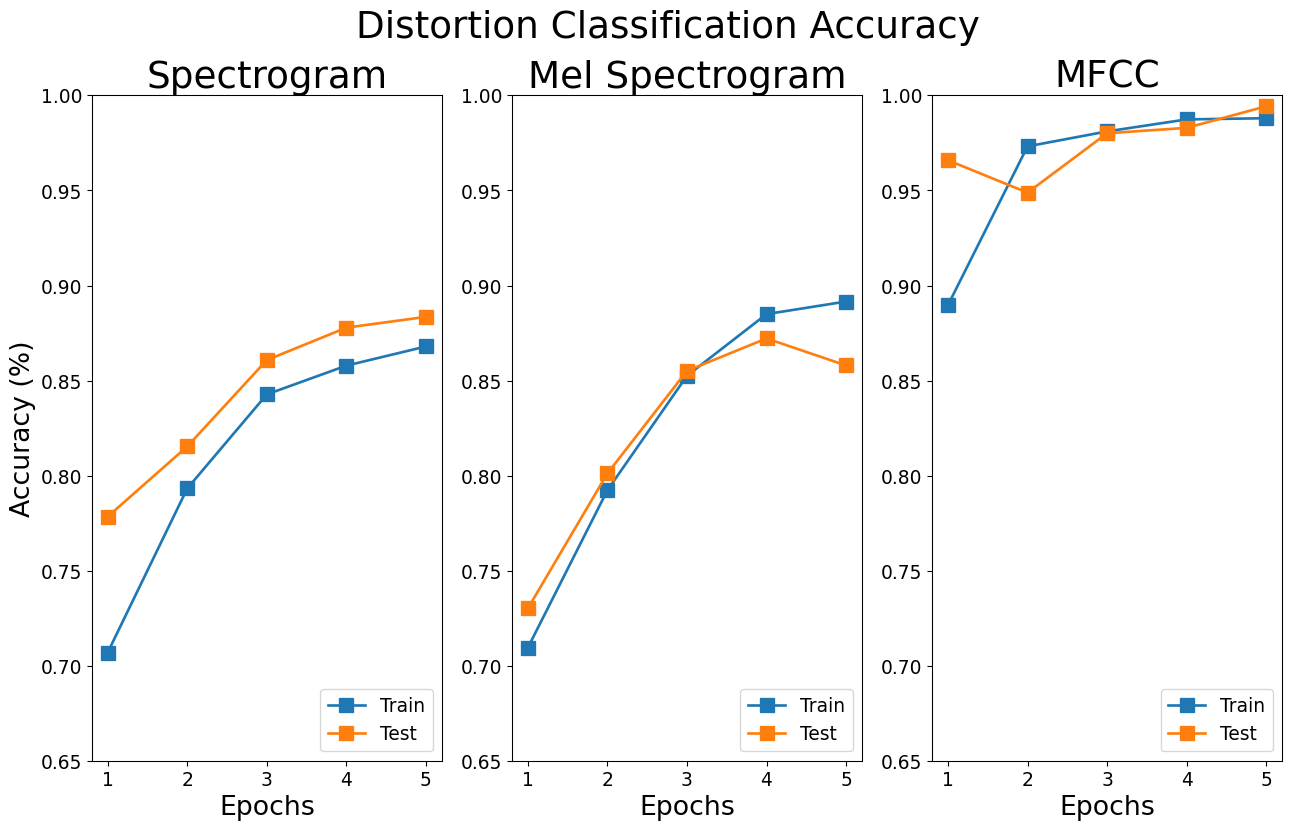

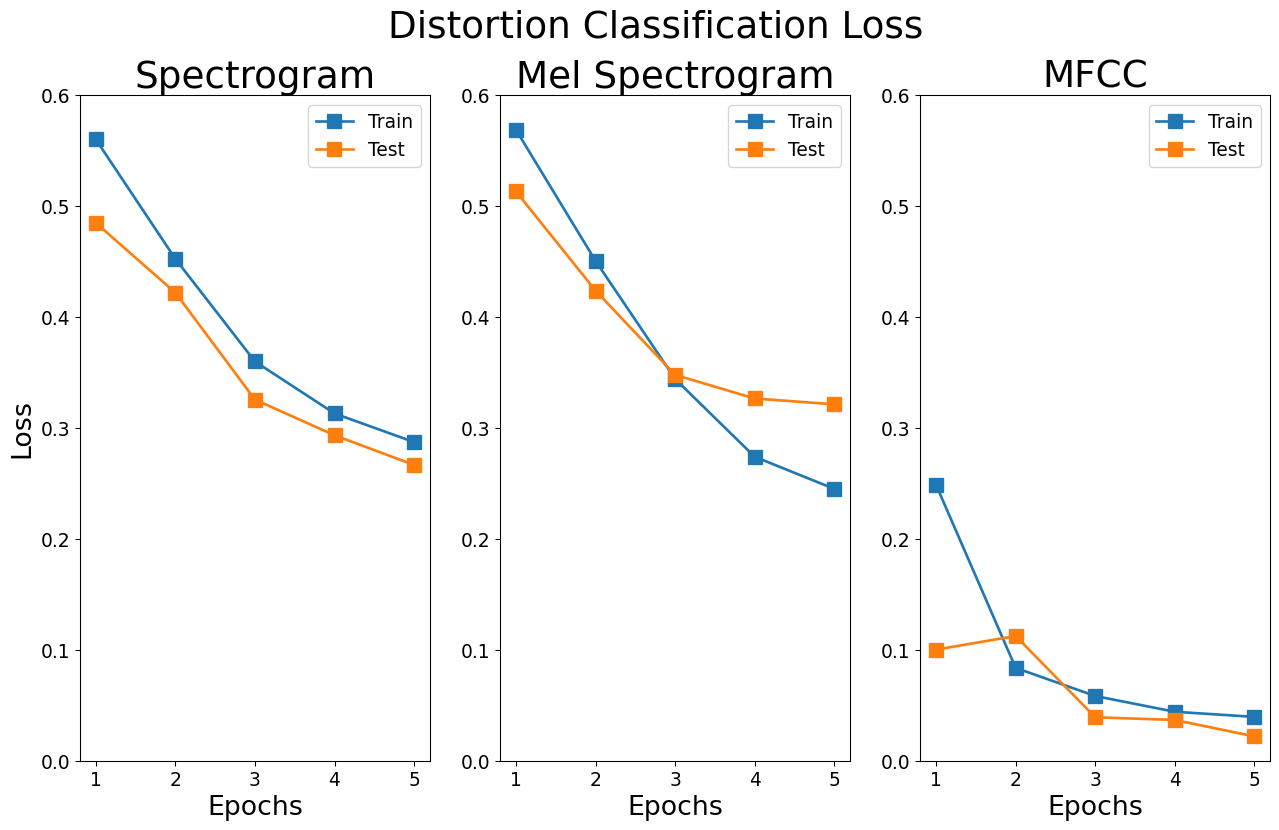

,Accuracy,Precision,Recall,F1_score
Spectrogram,0.8596,0.7783,0.9509,0.8560
Mel Spectrogram,0.8534,0.9427,0.8134,0.8733
MFCC,0.9910,0.9898,0.9934,0.9916


In [2]:
from src.util import plot_confusion_matrix, plot_train_line, load_train_data, load_train_data_error, cm_score

TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/c53_classify_od/'

LABELS_ID = ['bypass', 'activate']
NAME_MAP = ['spec', 'mel', 'mfcc']
TRANSFORM_MAP = ['Spectrogram', 'Mel Spectrogram', 'MFCC']
acc_list, loss_list, error_list = [], [], []

for i in range(3):

    acc, loss = load_train_data(TRAIN_DIR + 'c53_classify_od_' + NAME_MAP[i] + '/')
    error = np.load(EVUAL_DIR + 'c53_classify_od_' + NAME_MAP[i] + '_evaluation.npy')

    cm_fig = plot_confusion_matrix(confusion_matrix(y_true=error[0], y_pred=error[1]),
                                        title='Confusion Matrix: Distortion Classification (' + TRANSFORM_MAP[i] + ')',
                                        classes=LABELS_ID)

    cm_fig.savefig(PLOT_DIR + 'single_classify_cm_' + NAME_MAP[i] + '.png')

    acc_list.append(acc)
    loss_list.append(loss)
    error_list.append(cm_score(error))

acc_fig = plot_train_line(data=acc_list,
                num_subplot=3,
                subtitle="Distortion Classification Accuracy",
                title=TRANSFORM_MAP,
                legend_loc='lower right',
                x_label='Epochs',
                y_label='Accuracy (%)',
                x_ticks=np.arange(1, 6, 1), 
                y_ticks=np.arange(0.65, 1.05, 0.05),
                hight=9, 
                width=16)

loss_fig = plot_train_line(data=loss_list,
                num_subplot=3,
                subtitle="Distortion Classification Loss",
                title=TRANSFORM_MAP,
                legend_loc='upper right',
                x_label='Epochs',
                y_label='Loss',
                x_ticks=np.arange(1, 6, 1), 
                y_ticks=np.arange(0, 0.7, 0.1),
                hight=9, 
                width=16)

acc_fig.savefig(PLOT_DIR + 'single_classify_acc.png')
loss_fig.savefig(PLOT_DIR + 'single_classify_loss.png')

df = pd.DataFrame(error_list,
                  columns = ['Accuracy','Precision','Recall','F1_score'],
                  index = TRANSFORM_MAP)

# dfi.export(df, PLOT_DIR + 'single_classify_cm_score.png', dpi=200)
df

### EX2: Effect Classification

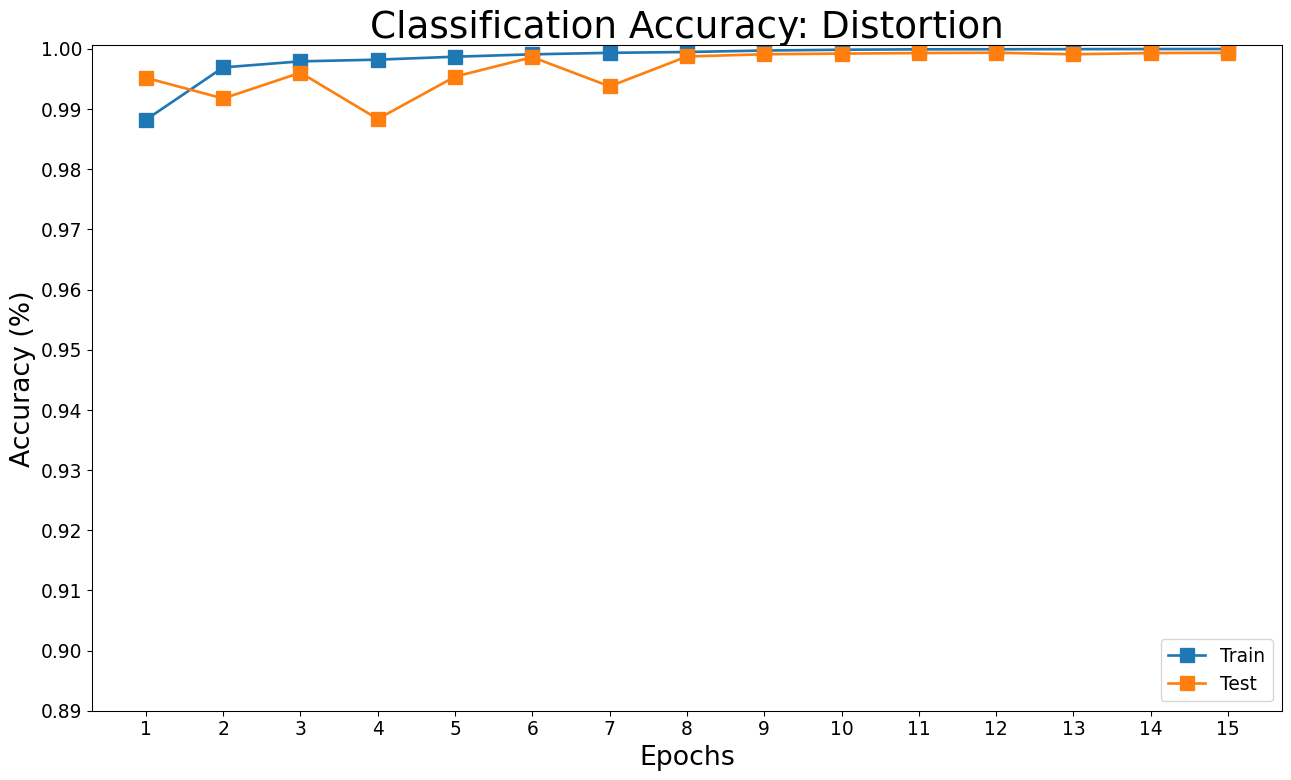

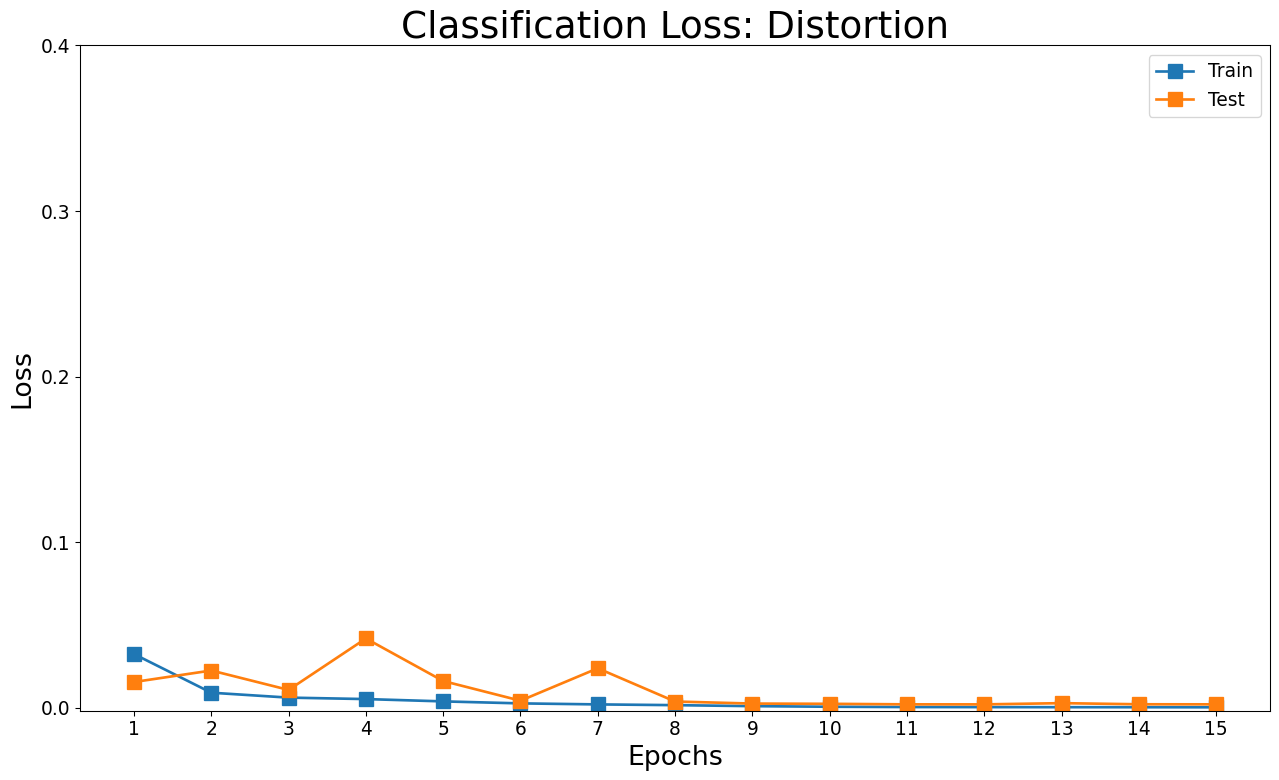

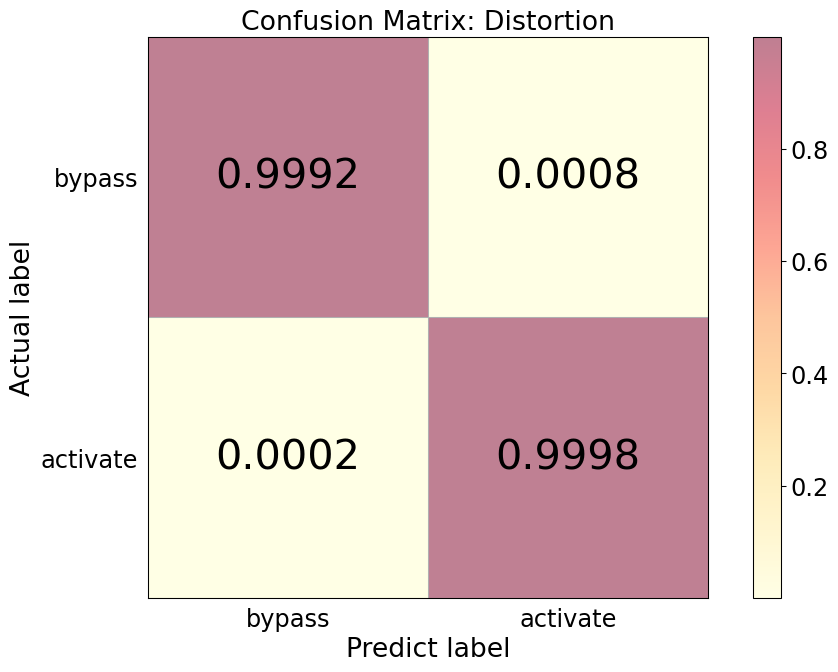

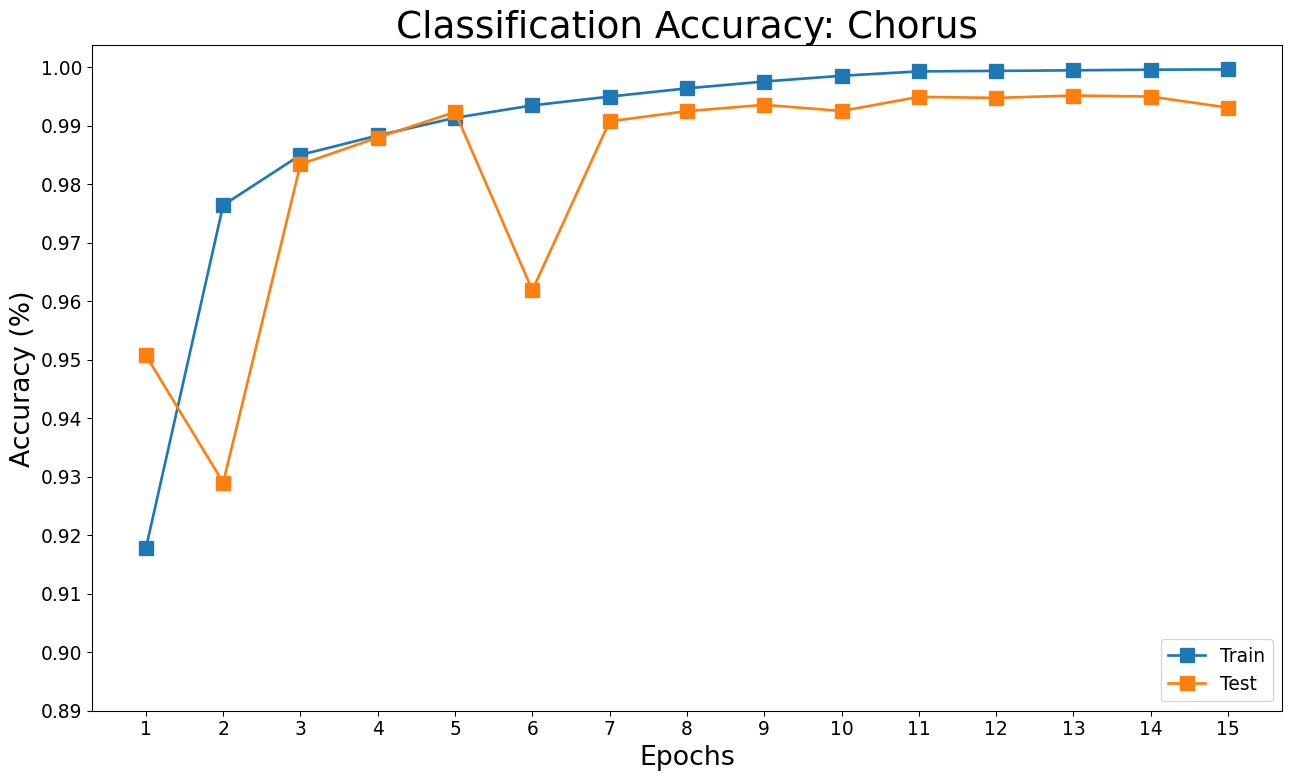

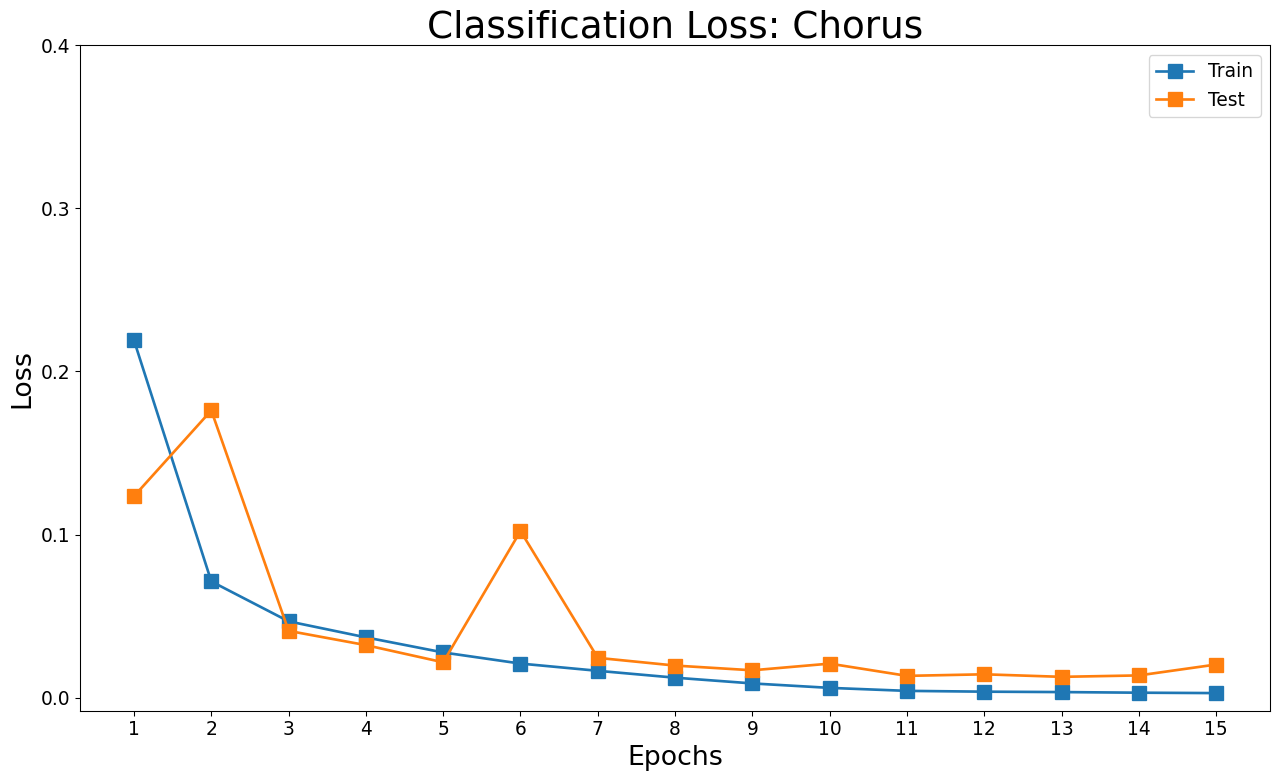

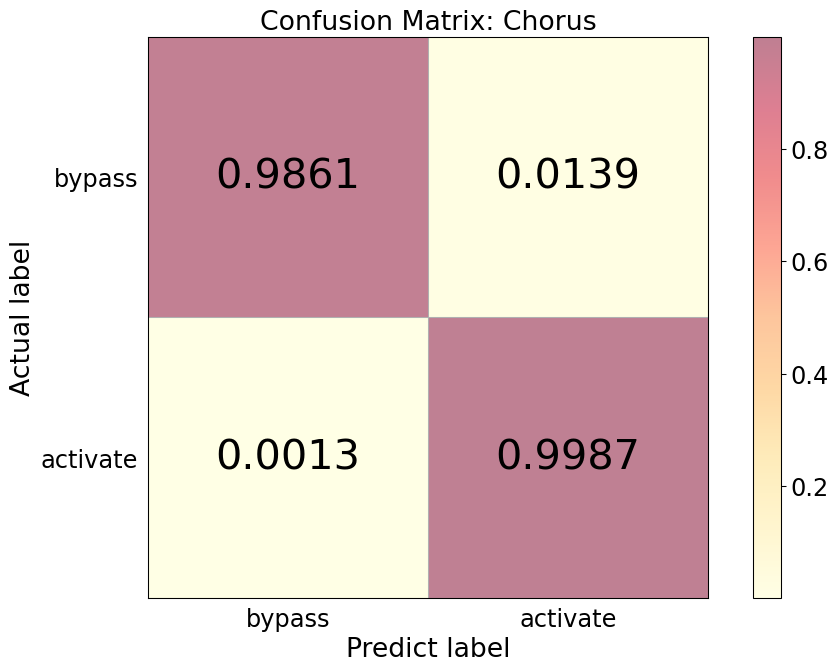

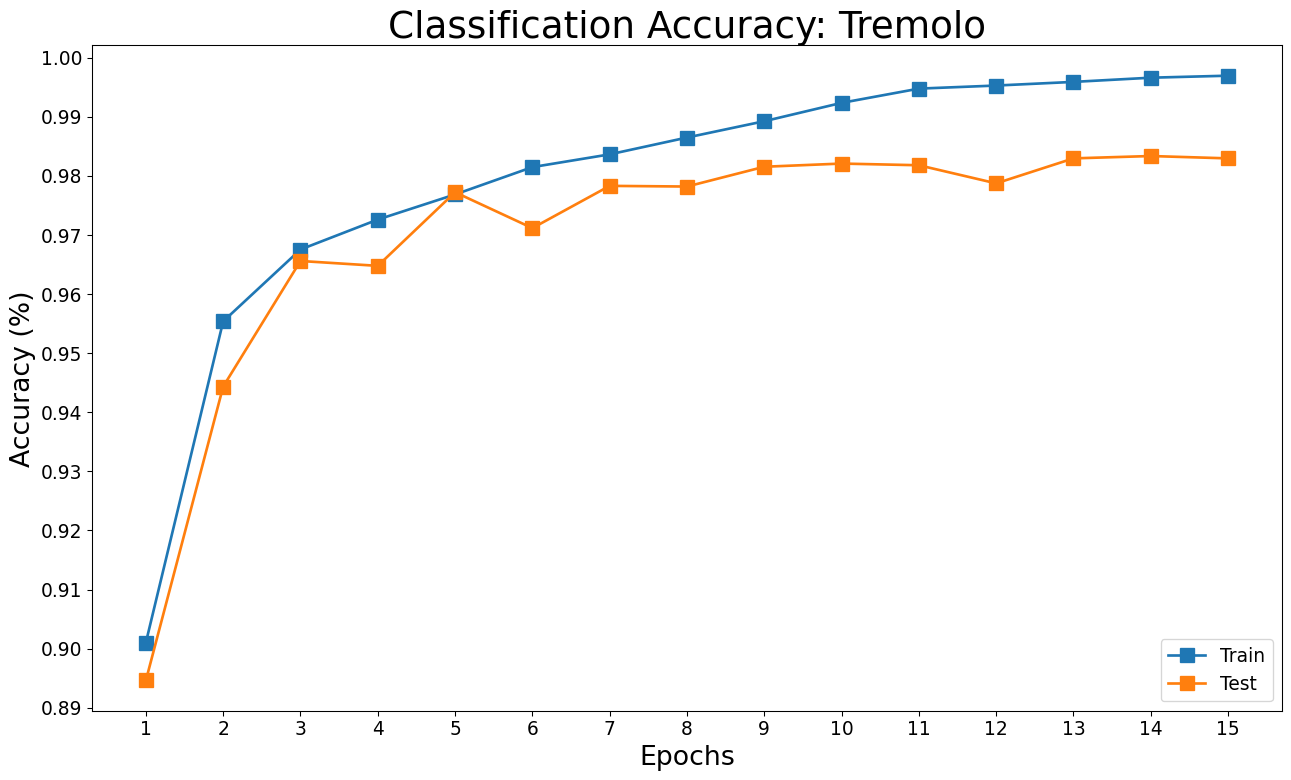

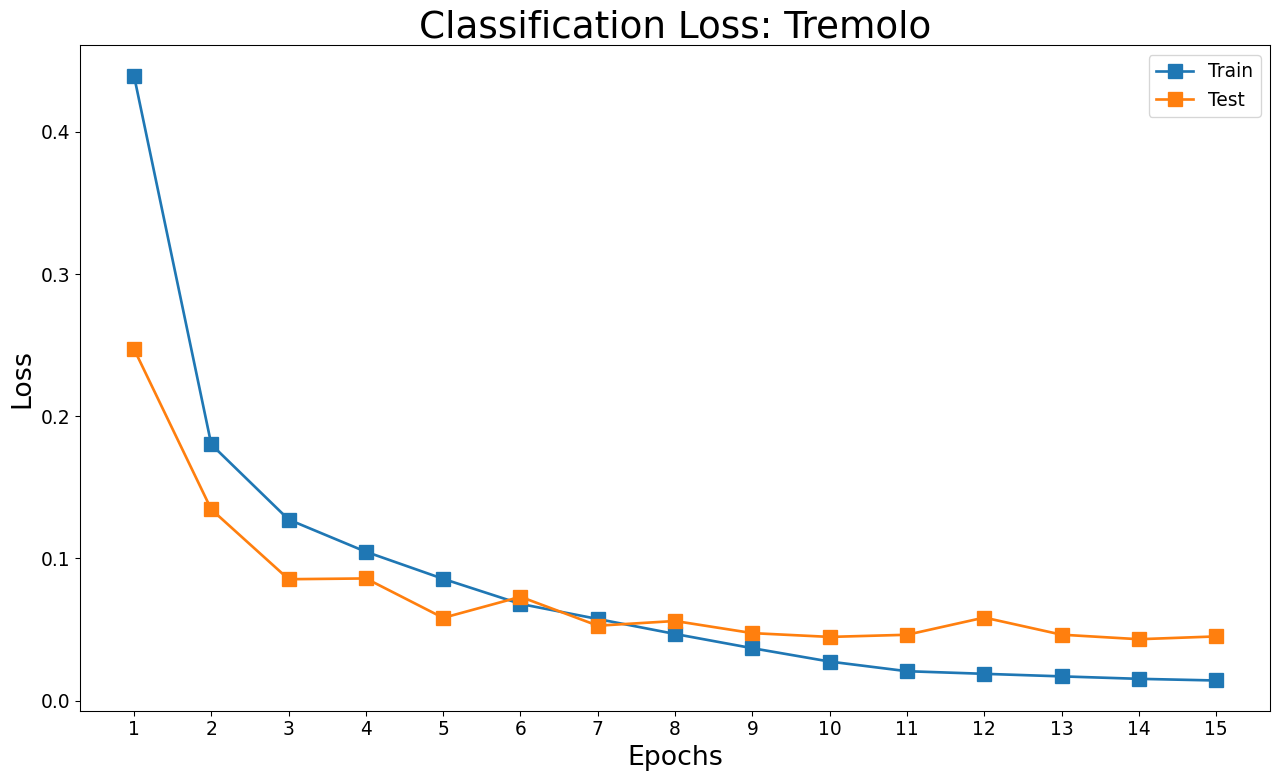

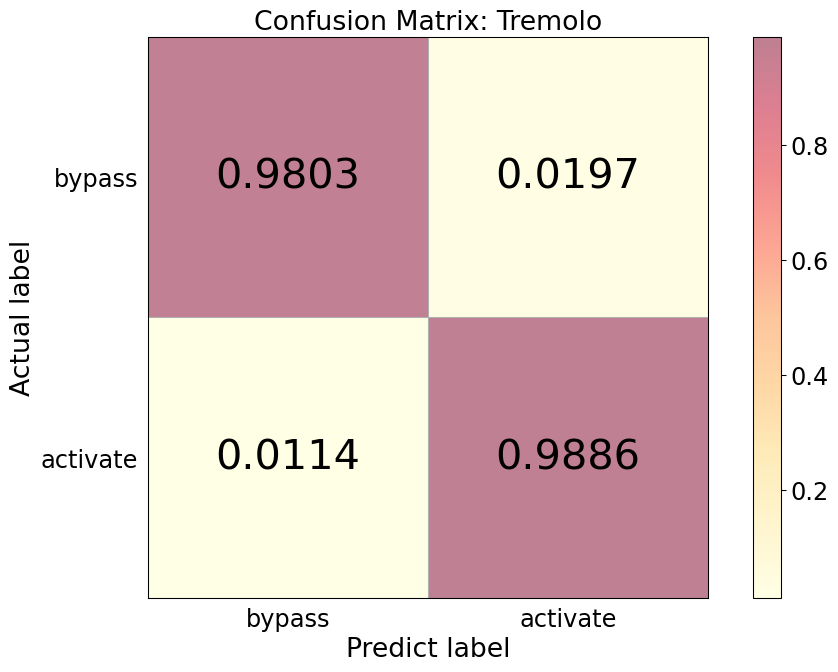

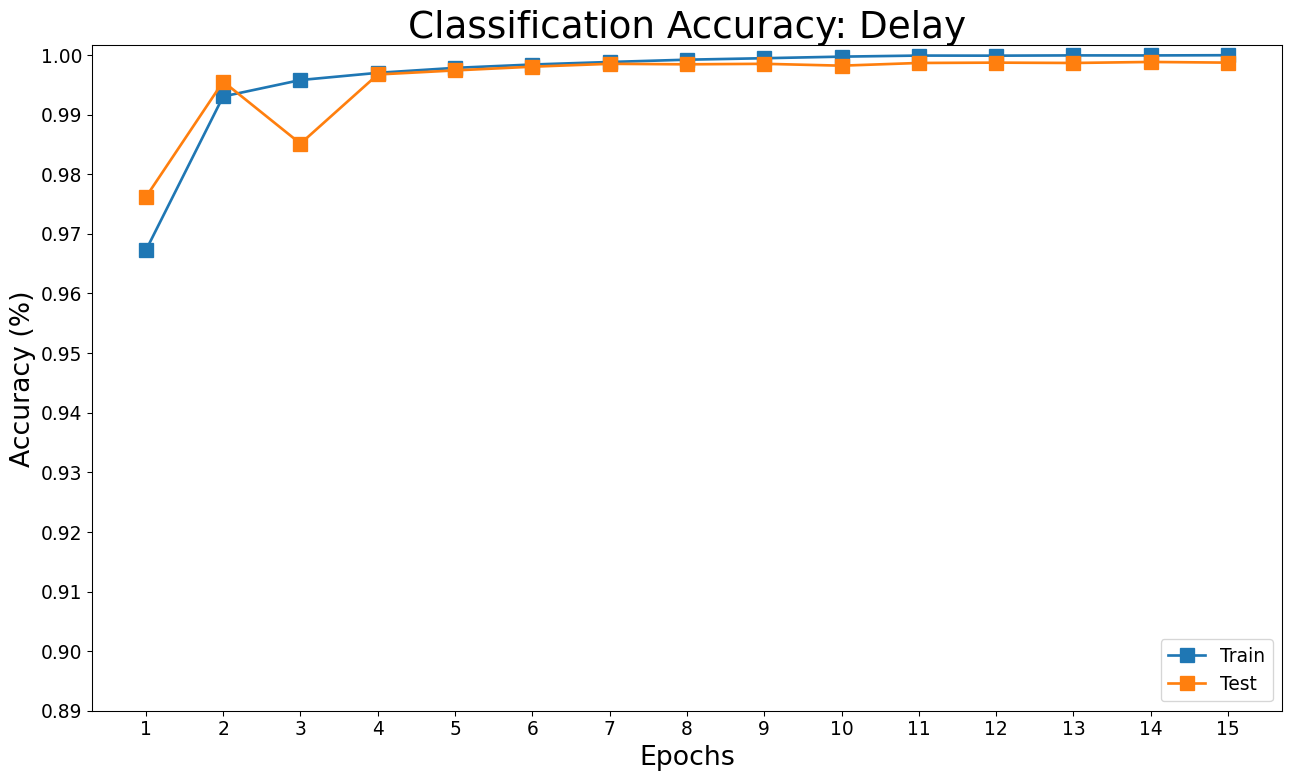

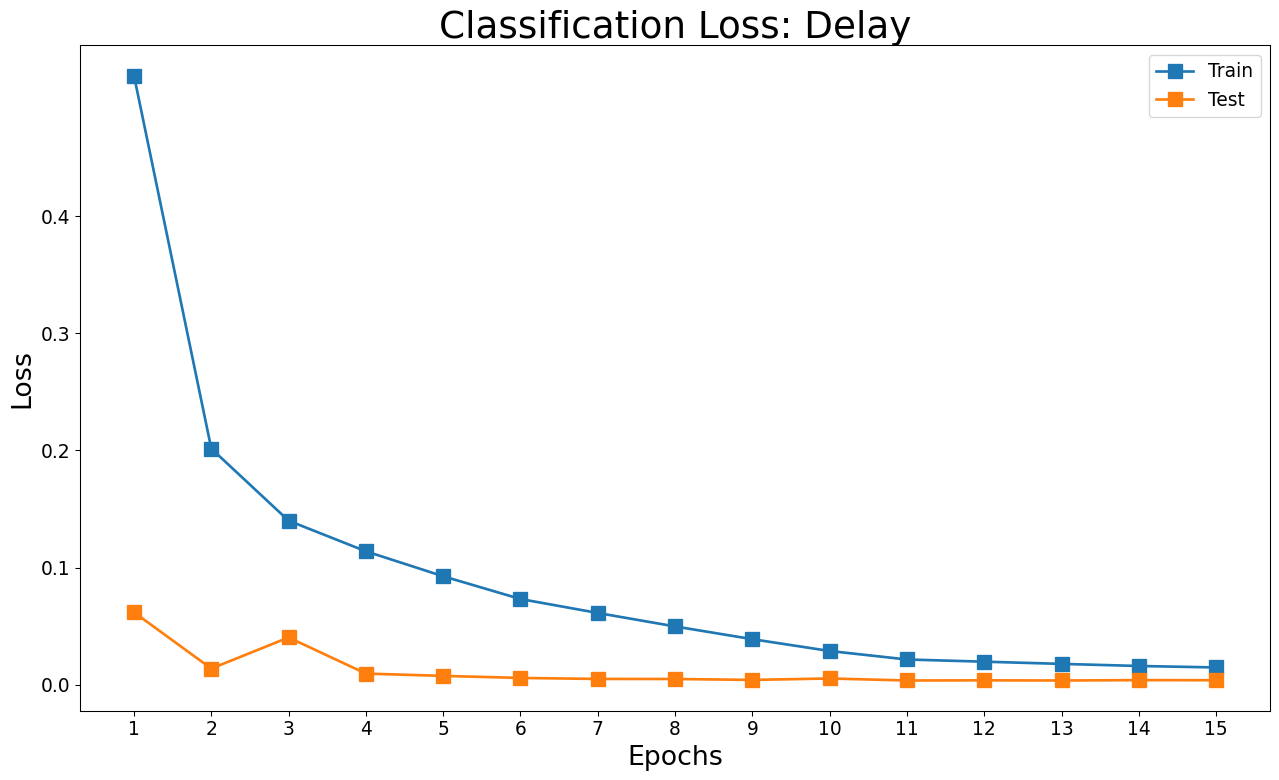

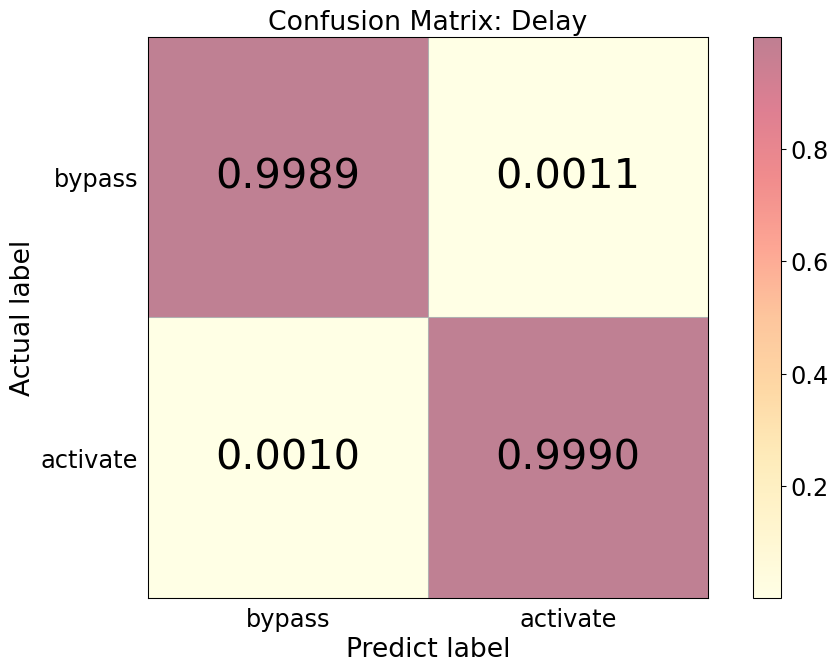

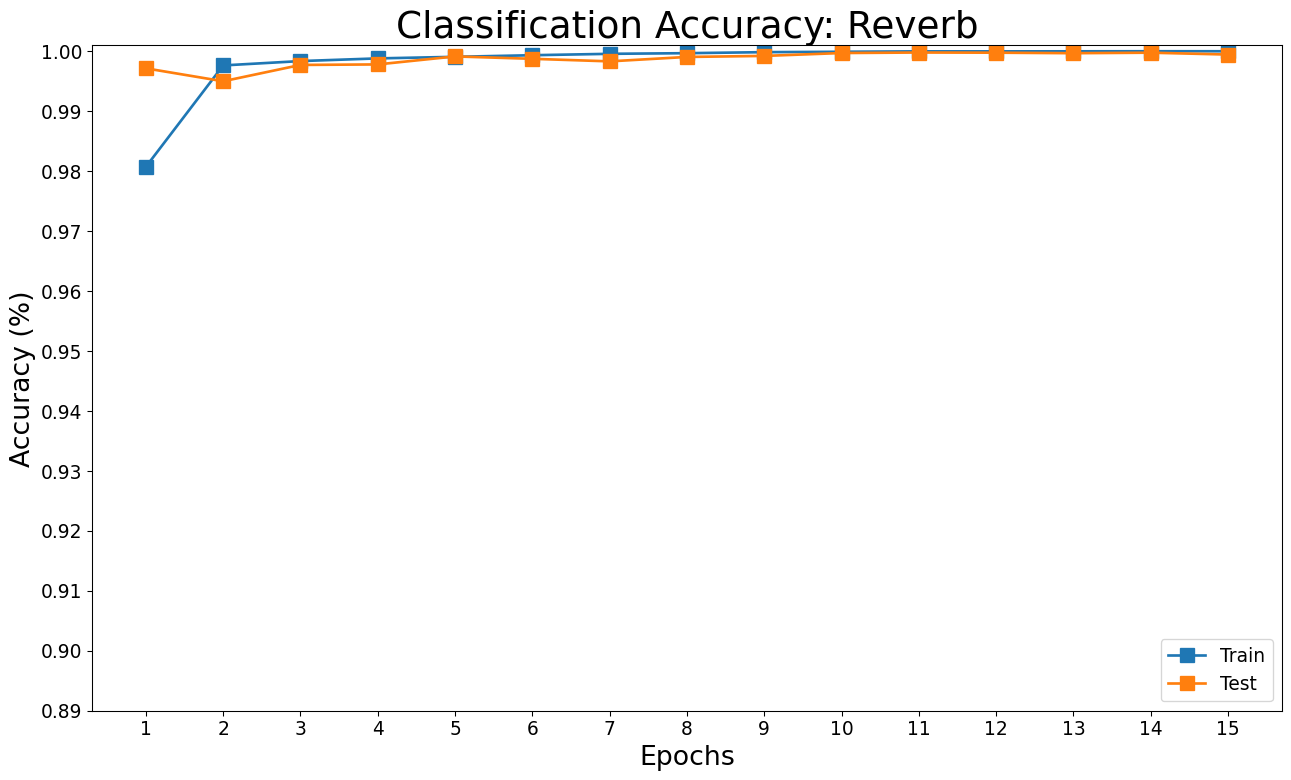

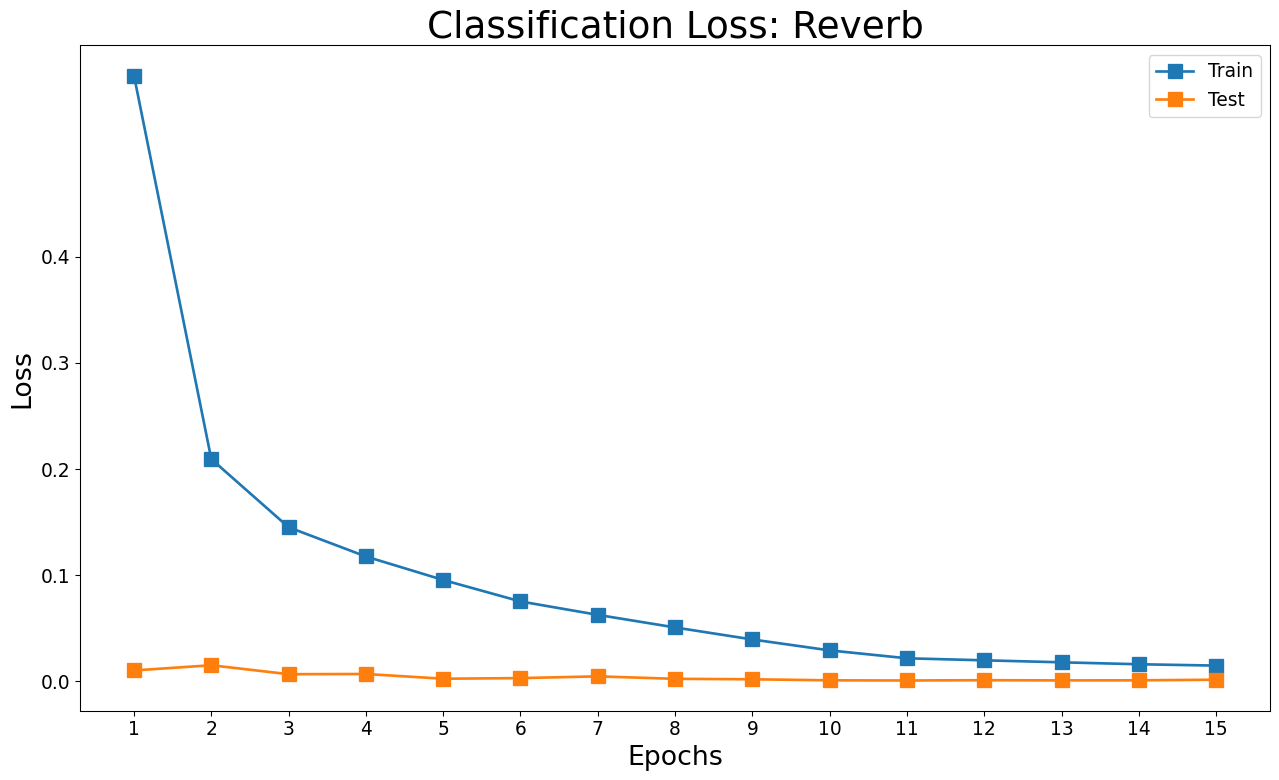

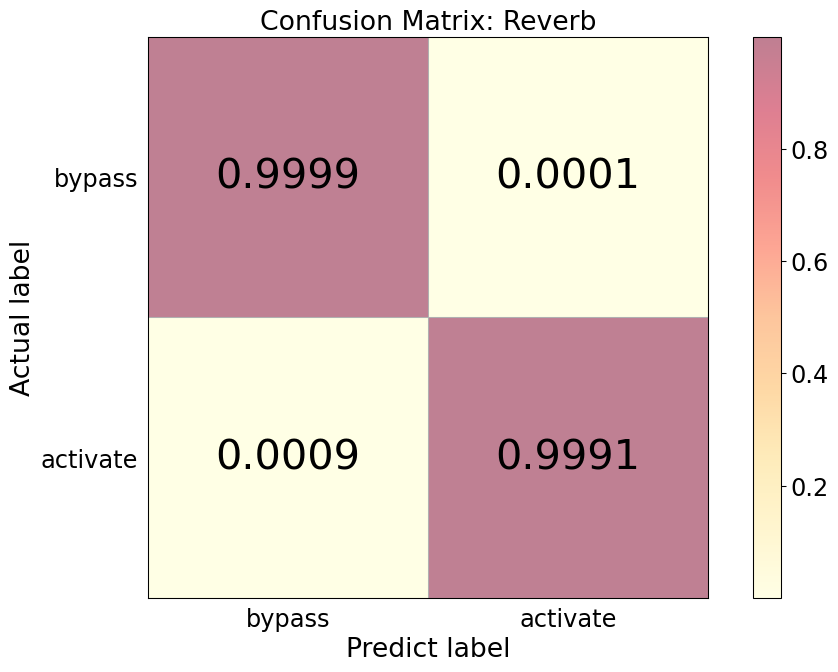

,Accuracy,Precision,Recall,F1_score
Distortion,0.9995,0.9993,0.9998,0.9995
Chorus,0.9928,0.9878,0.9987,0.9932
Tremolo,0.9848,0.9829,0.9886,0.9858
Delay,0.9990,0.9991,0.9990,0.9990
Reverb,0.9995,0.9999,0.9991,0.9995


In [3]:
from src.util import plot_confusion_matrix, plot_train_line, load_train_data, load_train_data_error, cm_score

TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/c53_classify/'

LABELS_ID = ['bypass', 'activate']
EFFECT_MAP = ["Distortion", "Chorus", "Tremolo", "Delay", "Reverb"]

error_list = []

for i in range(5):

    acc, loss = load_train_data(TRAIN_DIR + 'c53_classify/' + str(i) + '_')
    error = np.load(EVUAL_DIR + 'c53_classify_' + str(i) + '_evaluation.npy')

    acc_fig = plot_train_line(data=acc,
                    num_subplot=1,
                    subtitle="Classification Accuracy: " + EFFECT_MAP[i],
                    legend_loc='lower right',
                    x_label='Epochs',
                    y_label='Accuracy (%)',
                    x_ticks=np.arange(1, 16, 1), 
                    y_ticks=np.arange(0.89, 1.01, 0.01),
                    hight=9, 
                    width=16)

    loss_fig = plot_train_line(data=loss,
                    num_subplot=1,
                    subtitle="Classification Loss: " + EFFECT_MAP[i],
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Loss',
                    x_ticks=np.arange(1, 16, 1), 
                    y_ticks=np.arange(0, 0.5, 0.1),
                    hight=9, 
                    width=16)

    cm_fig = plot_confusion_matrix(confusion_matrix(y_true=error[0], y_pred=error[1]),
                                        title='Confusion Matrix: ' + EFFECT_MAP[i],
                                        classes=LABELS_ID)

    acc_fig.savefig(PLOT_DIR + 'classify_acc_' + EFFECT_MAP[i] + '.png')
    loss_fig.savefig(PLOT_DIR + 'classify_loss_' + EFFECT_MAP[i] + '.png')
    cm_fig.savefig(PLOT_DIR + 'classify_cm_' + EFFECT_MAP[i] + '.png')

    error_list.append(cm_score(error))

df = pd.DataFrame(error_list,
                  columns = ['Accuracy','Precision','Recall','F1_score'],
                  index = EFFECT_MAP)

# dfi.export(df, PLOT_DIR + 'classify_cm_score.png', dpi=200)

df

### EX3: Parameter Extraction

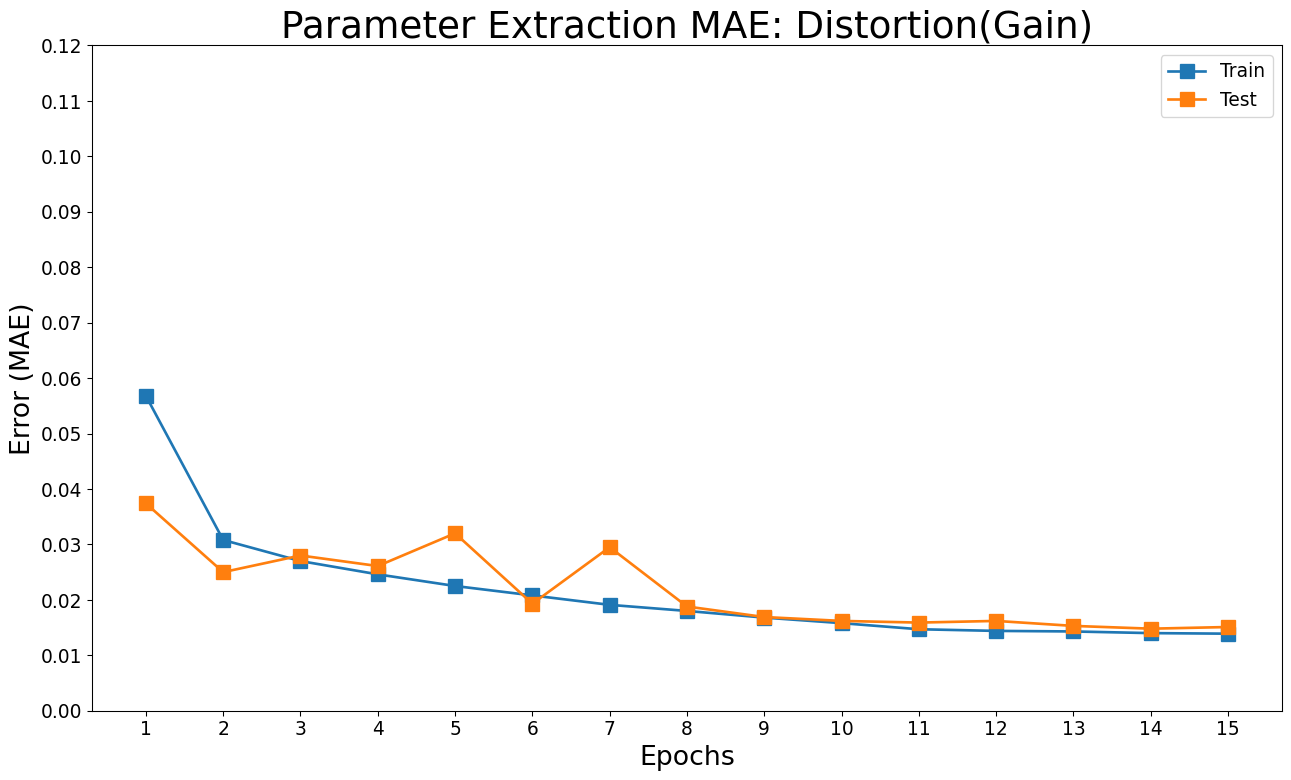

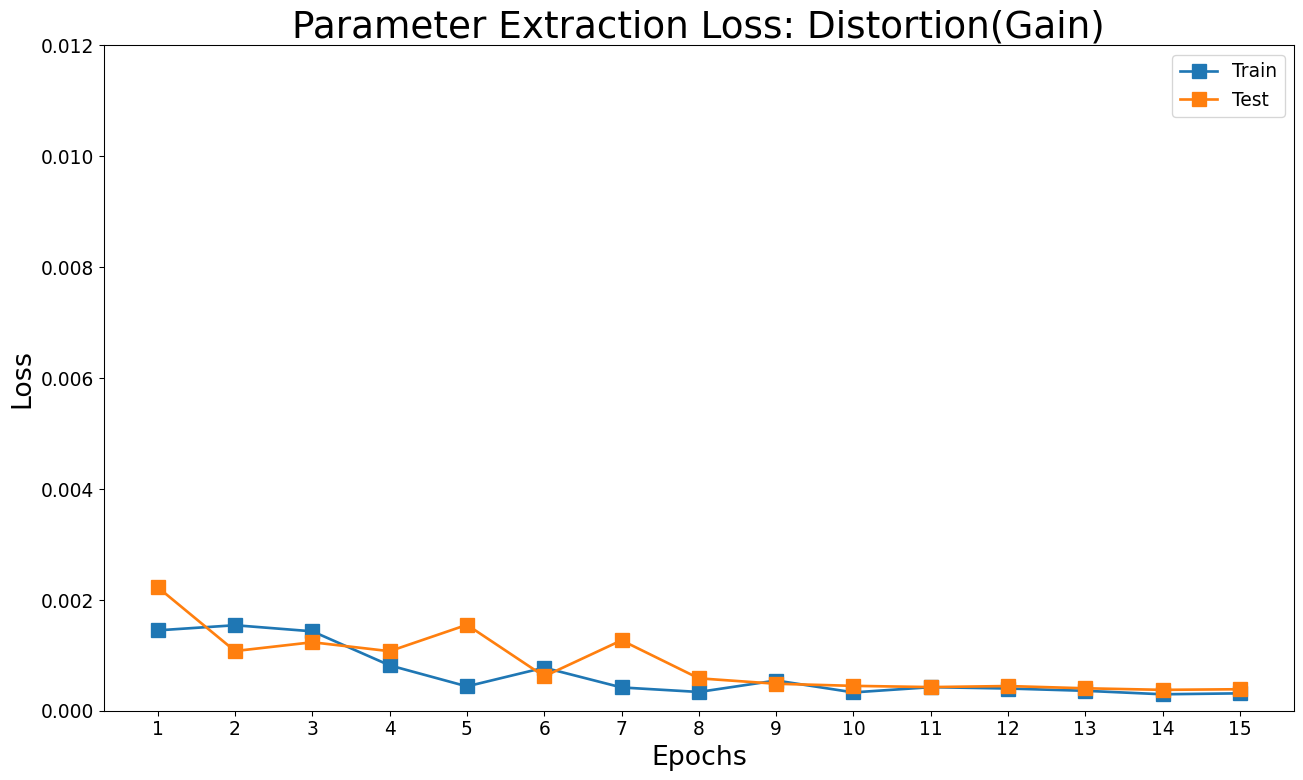

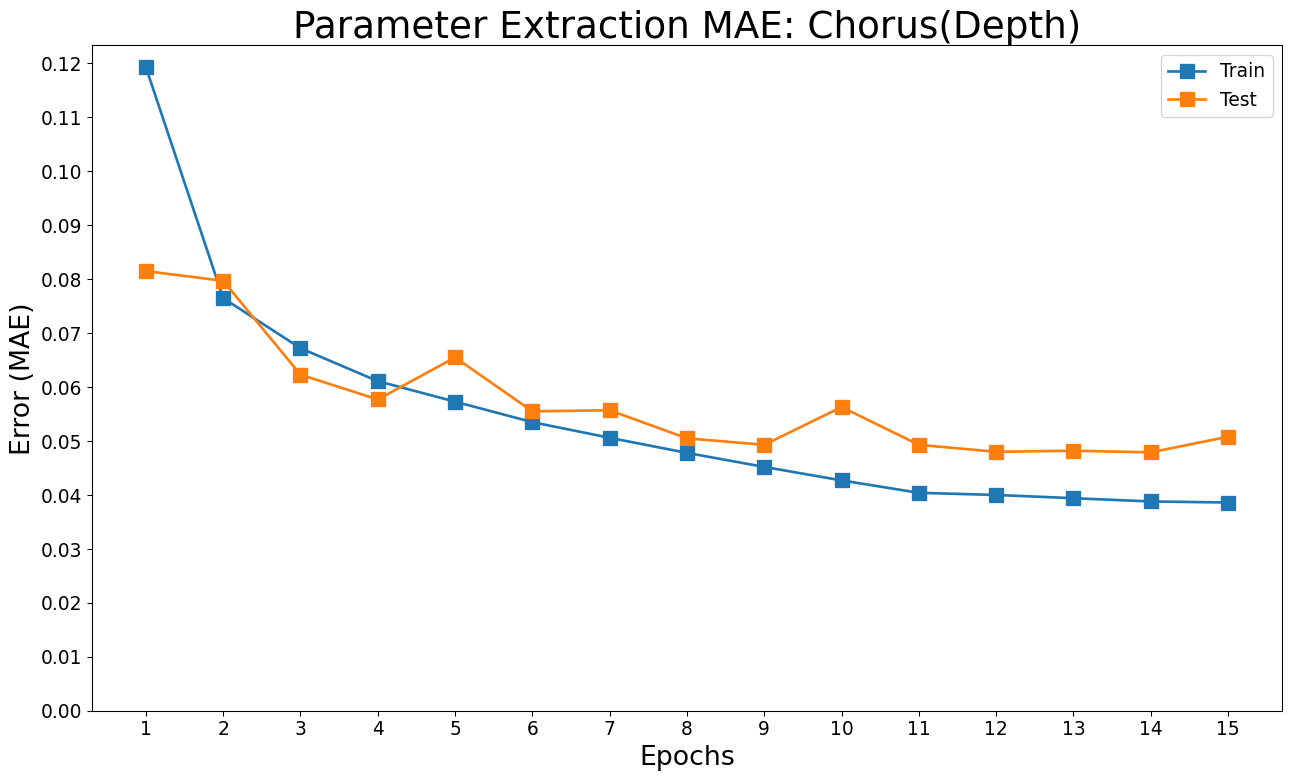

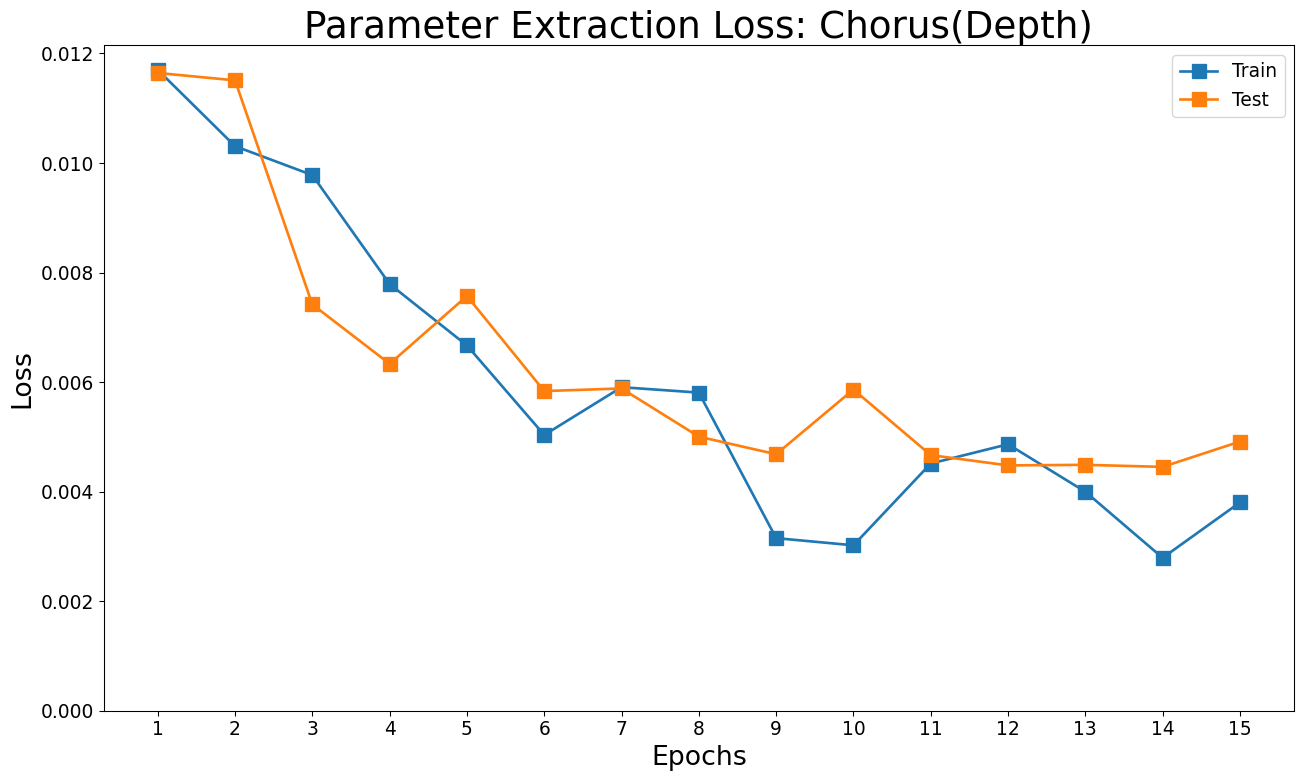

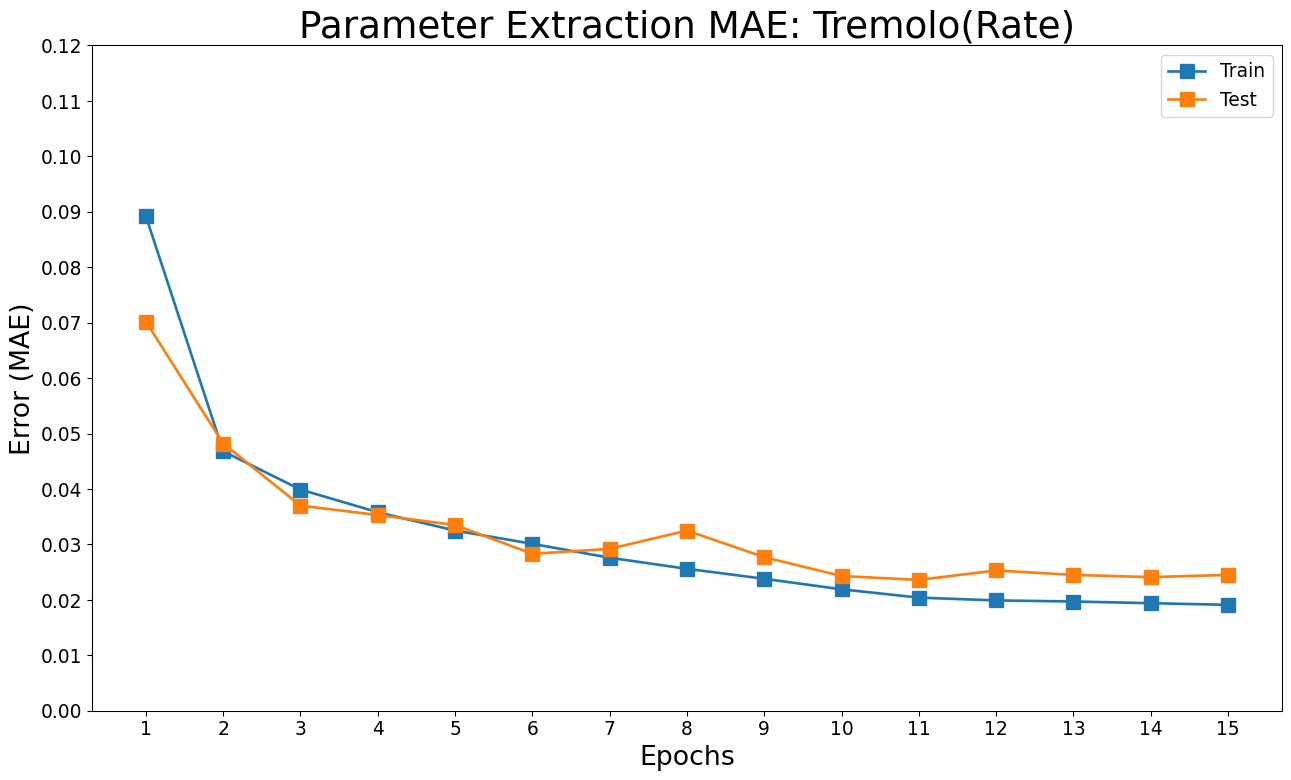

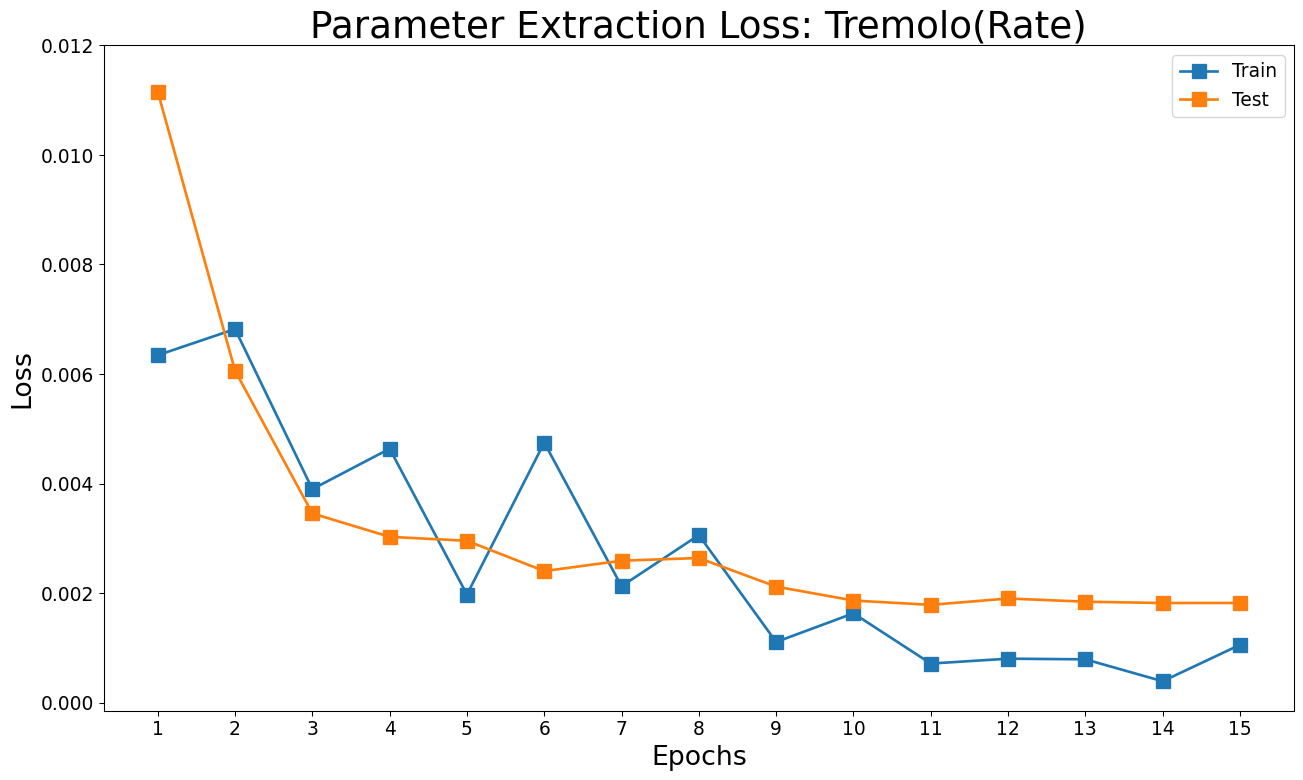

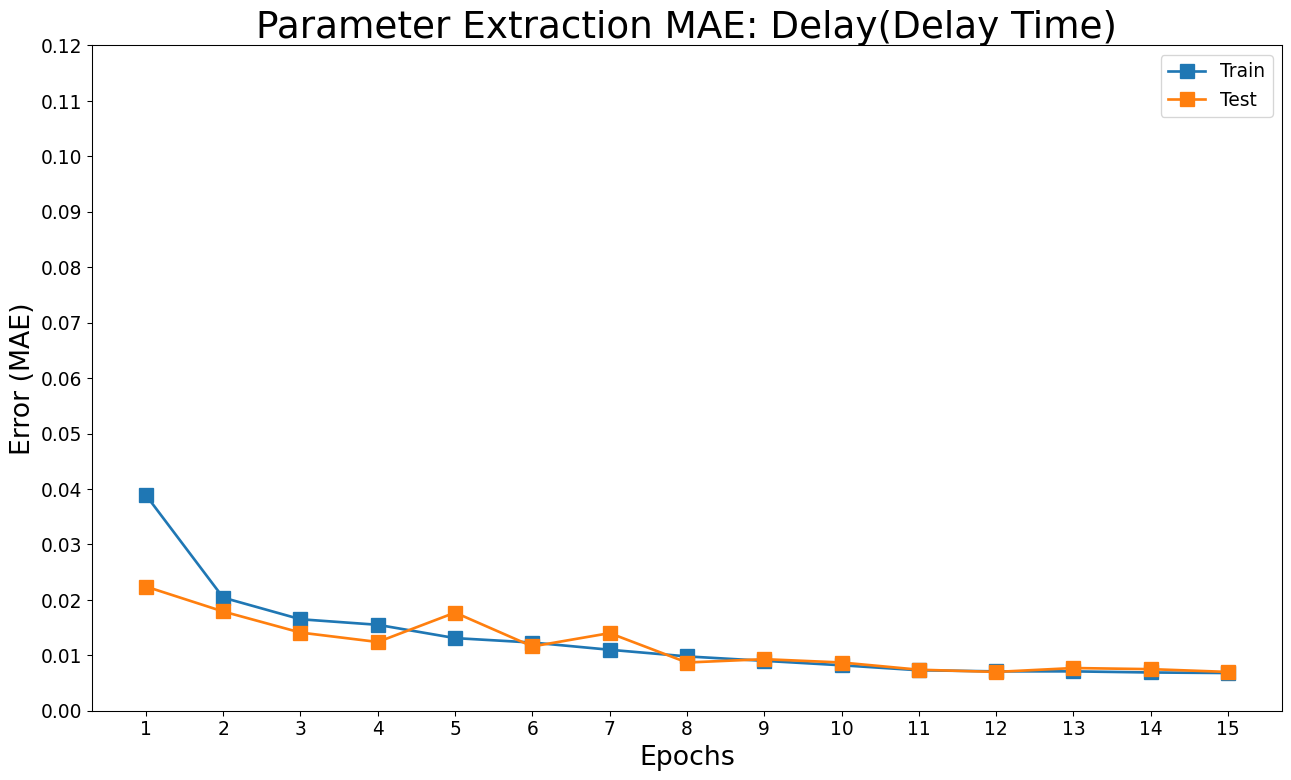

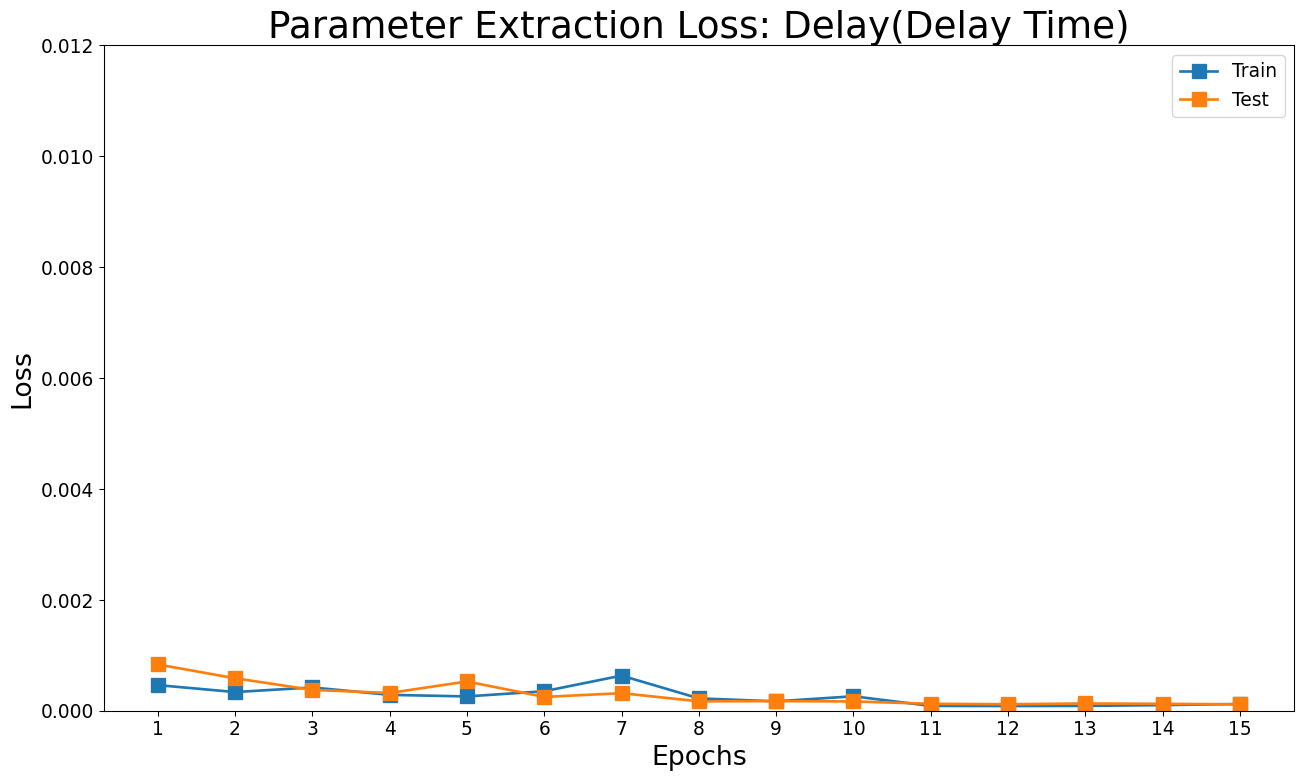

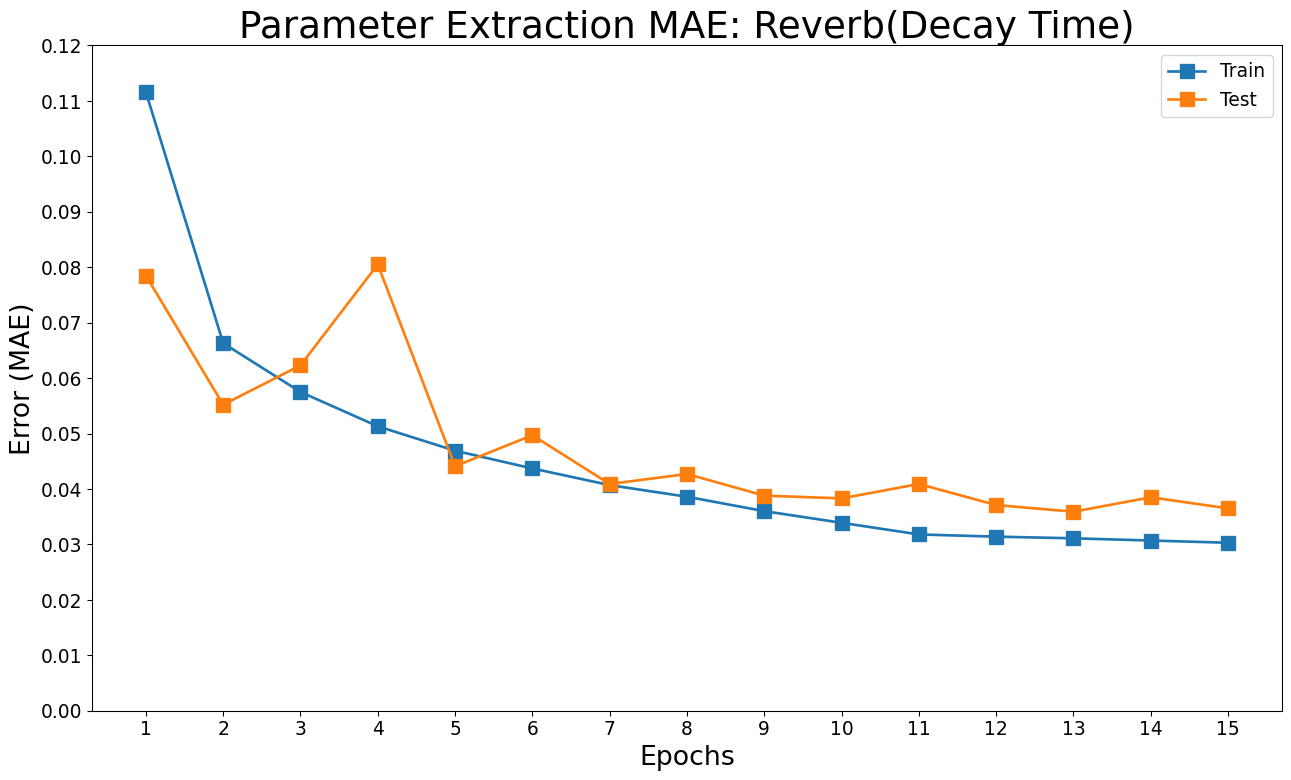

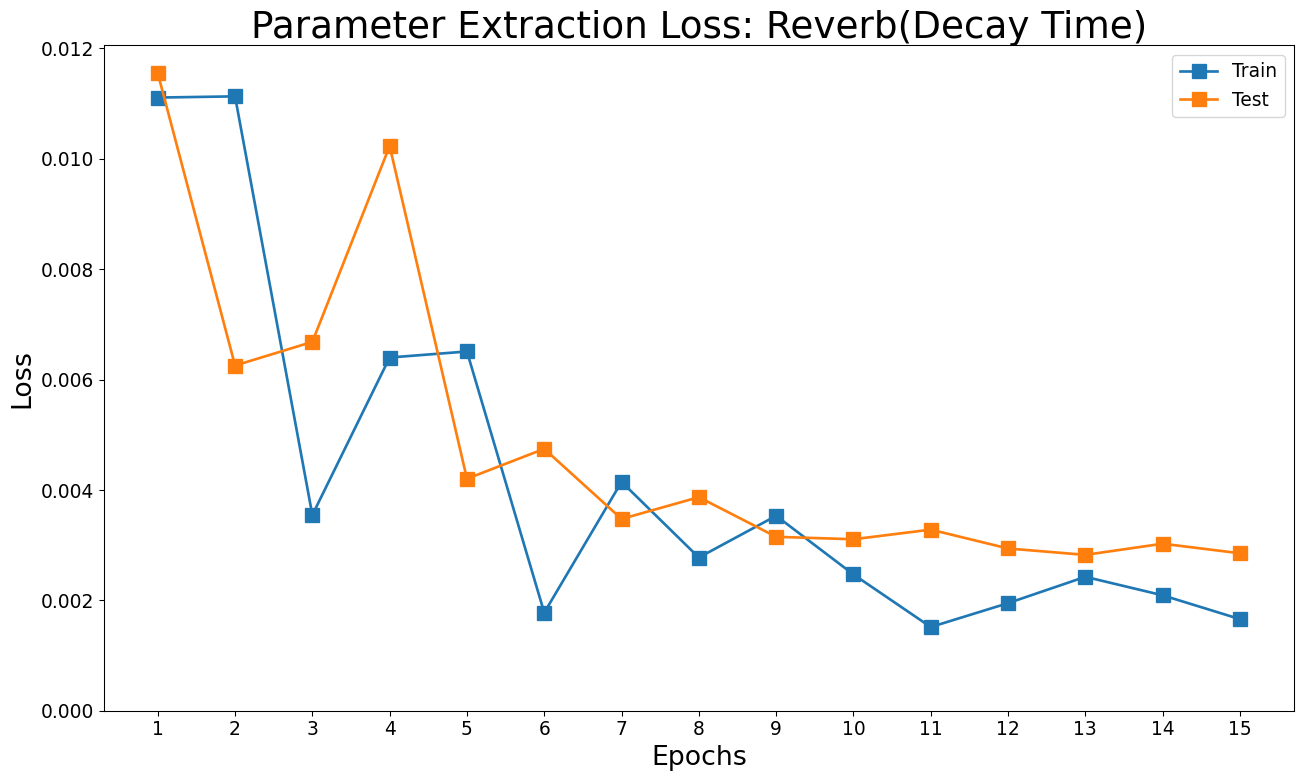

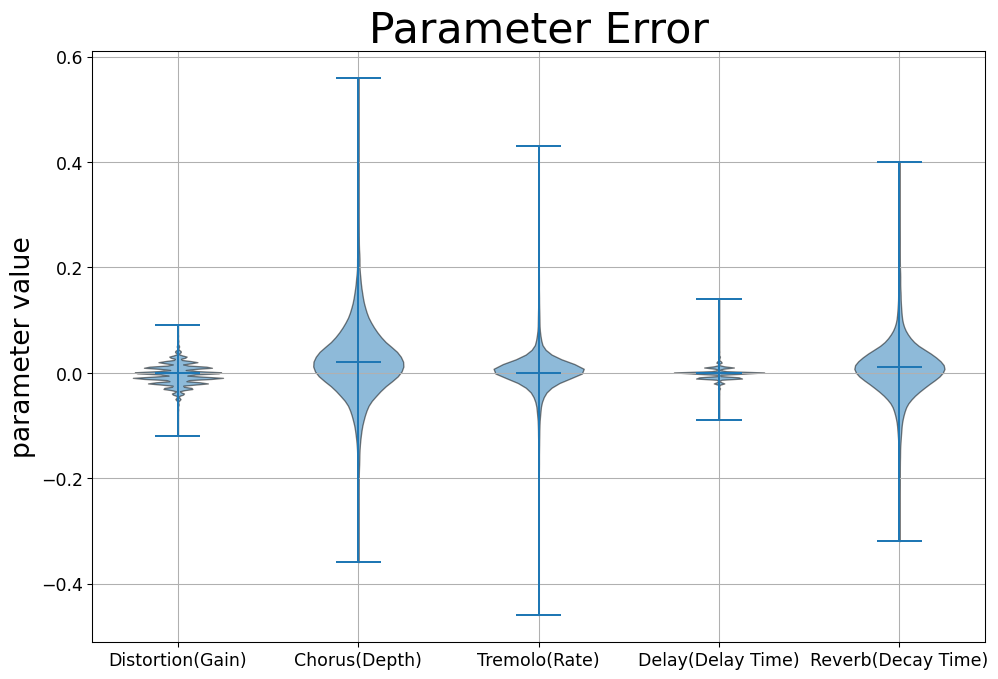

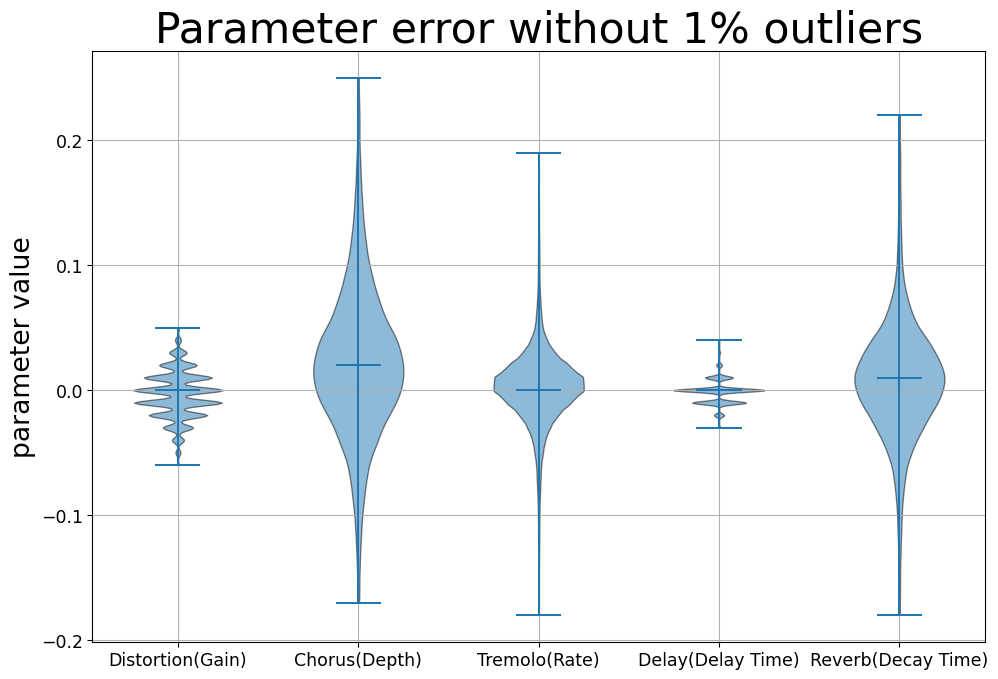

,Mean,Median,MAE,MSE
Distortion(Gain),-0.0034,0.00,0.0150,0.000388
Chorus(Depth),0.0216,0.02,0.0499,0.004786
Tremolo(Rate),0.0021,0.00,0.0248,0.001873
Delay(Delay Time),-0.0016,0.00,0.0070,0.000125
Reverb(Decay Time),0.0080,0.01,0.0369,0.002908


In [3]:
from src.util import plot_train_line, load_train_data, load_train_data_error, plot_violin, remove_percentile_outliers

TRAIN_DIR = '_log/Legacy/Training/'
EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/c53_parameter/'

EFFECT_MAP2 = ["Distortion(Gain)", "Chorus(Depth)", "Tremolo(Rate)", "Delay(Delay Time)", "Reverb(Decay Time)"]

error_list = []
error_list2 = []
for i in range(5):

    mse, loss = load_train_data_error(TRAIN_DIR + 'c53_parameter/' + str(i) + '_')
    error = np.load(EVUAL_DIR + 'c53_parameter_' + str(i) + '_evaluation.npy')

    mse_fig = plot_train_line(data=mse,
                    num_subplot=1,
                    subtitle="Parameter Extraction MAE: " + EFFECT_MAP2[i],
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Error (MAE)',
                    x_ticks=np.arange(1, 16, 1), 
                    y_ticks=np.arange(0, 0.13, 0.01),
                    hight=9, 
                    width=16)

    loss_fig = plot_train_line(data=loss,
                    num_subplot=1,
                    subtitle="Parameter Extraction Loss: " + EFFECT_MAP2[i],
                    legend_loc='upper right',
                    x_label='Epochs',
                    y_label='Loss',
                    x_ticks=np.arange(1, 16, 1), 
                    y_ticks=np.arange(0, 0.014, 0.002),
                    hight=9, 
                    width=16)
    
    mse_fig.savefig(PLOT_DIR + 'parameter_mse_' + EFFECT_MAP2[i] + '.png')
    loss_fig.savefig(PLOT_DIR + 'parameter_loss_' + EFFECT_MAP2[i] + '.png')
    
    error_list.append(error)
    error_list2.append(remove_percentile_outliers(error, percent_to_drop=0.01))

box = plot_violin(error_list, title="Parameter Error", labels=EFFECT_MAP2, ylabel="parameter value", outlier=True)
box2 = plot_violin(error_list2, title='Parameter error without 1'+"%" +' outliers', labels=EFFECT_MAP2, ylabel="parameter value", outlier=True)

box.savefig(PLOT_DIR + 'parameter_error_box.png')
box2.savefig(PLOT_DIR + 'parameter_error_box2.png')


table = []
for fx_error in error_list:

    m = round(np.mean(fx_error, axis=0), 4)
    md = round(np.median(fx_error, axis=0), 4)
    abs_error = round(np.abs(fx_error).mean(axis=0), 4)
    mse = round(np.square(fx_error).mean(axis=0), 6)
    table.append([m, md, abs_error, mse])

df = pd.DataFrame(table,
                  columns = ['Mean', 'Median', 'MAE','MSE'],
                  index = EFFECT_MAP2)

# dfi.export(df, PLOT_DIR + 'classify_cm_score.png', dpi=200)

df

#### EX4: Signal Chain Reconstruction

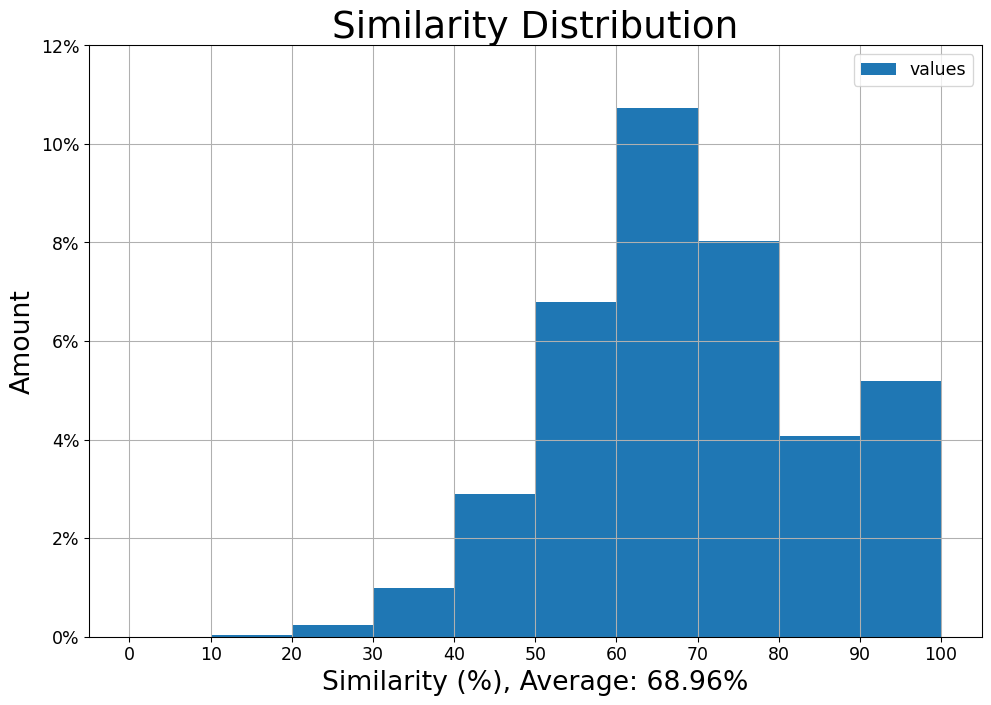

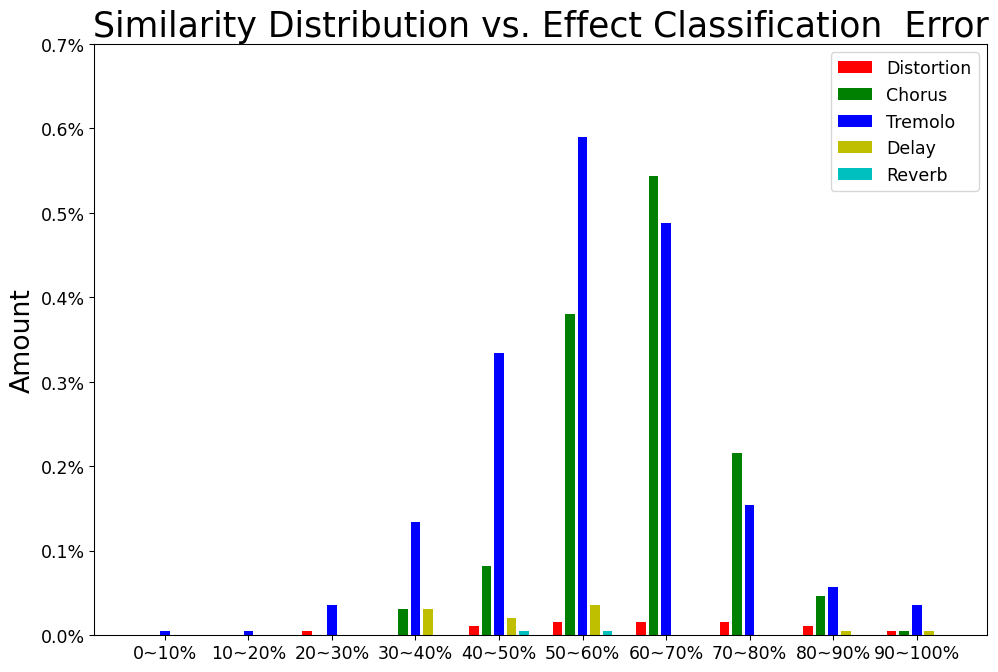

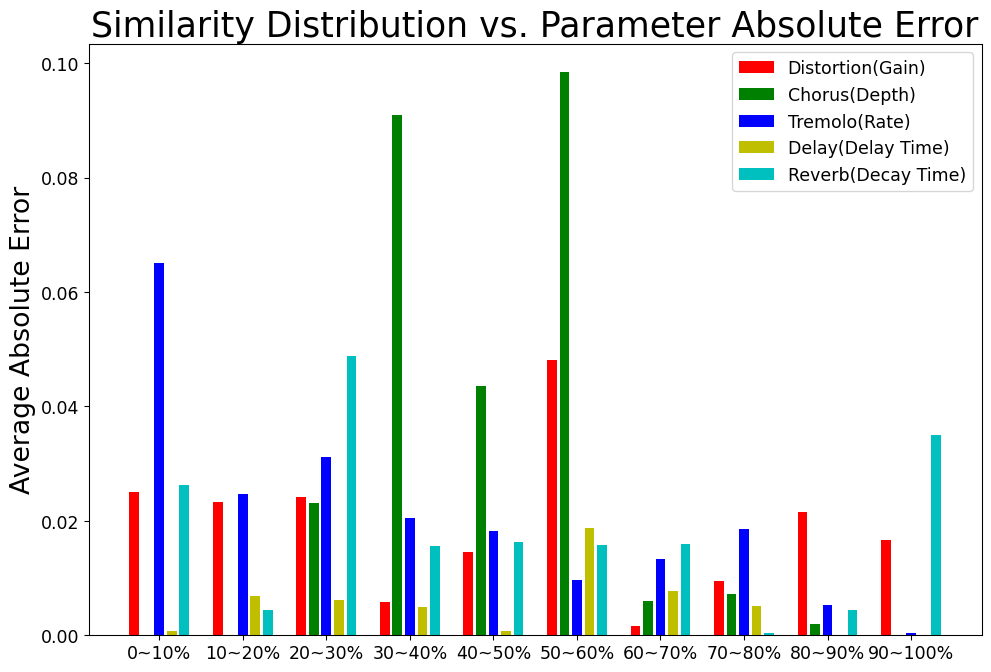

In [5]:
from src.util import hist_plot, multi_bar_plot, multi_bar_plot_percent

EVUAL_DIR = '_log/Legacy/Evaluation/'
PLOT_DIR = '_log/Legacy/Plot/c53_signal_chain/'

EFFECT_MAP = ["Distortion", "Chorus", "Tremolo", "Delay", "Reverb"]
EFFECT_MAP2 = ["Distortion(Gain)", "Chorus(Depth)", "Tremolo(Rate)", "Delay(Delay Time)", "Reverb(Decay Time)"]

xlabels = ['0~10%', '10~20%', '20~30%', '30~40%', '40~50%', '50~60%', '60~70%', '70~80%', '80~90%', '90~100%']

error = np.load(EVUAL_DIR + 'c53_signal_chain' + '_evaluation.npy')
error_rotate = np.rot90(error, -1)
similiarity = np.array(error_rotate[11], dtype=float)

avg = 0
for i in range(len(similiarity)):
    avg = avg + float(error[i][11])

avg = avg/len(similiarity)

bins = np.arange(0, 110, 10) # fixed bin size

hist = hist_plot(similiarity,
                 bins=bins, 
                 xlabel="Similarity (%), Average: " + str(round(avg, 2)) + "%",
                 ylabel="Amount", 
                 title="Similarity Distribution")

cm_amount = np.zeros((5,5,10), dtype=float)

for error_list in error:
    group = 0
    for k in range(10):
        sim = float(error_list[11])
        if sim >= bins[k] and sim < bins[k+1]:
            group = k
            break
    for i in range(5):
        actual = int(error_list[0][11+i])
        predict = float(error_list[2*i+1])

        if(actual == 1 and predict == 1.0):
            # print("TP")
            cm_amount[i][0][group] += 1
            cm_amount[i][4][group] = abs(cm_amount[i][4][group] + float(error_list[2*i+2]))/2
        elif(actual == 1 and predict == 0):
            # print("FN")
            cm_amount[i][1][group] += 1
        elif(actual == 0 and predict == 1.0):
            # print("FP")
            cm_amount[i][2][group] += 1
        elif(actual == 0 and predict == 0):
            # print("TN")
            cm_amount[i][3][group] += 1

bar1 = multi_bar_plot_percent((cm_amount[0][1] + cm_amount[0][2])/39000*2,
                              (cm_amount[1][1] + cm_amount[1][2])/39000*2,
                              (cm_amount[2][1] + cm_amount[2][2])/39000*2,
                              (cm_amount[3][1] + cm_amount[3][2])/39000*2,
                              (cm_amount[4][1] + cm_amount[4][2])/39000*2,
                              N=10,
                              color_list=['r', 'g', 'b', 'y', 'c'],
                              xlabels=xlabels,
                              ylabel="Amount",
                              title="Similarity Distribution vs. Effect Classification  Error",
                              legend=EFFECT_MAP)

bar2 = multi_bar_plot(cm_amount[0][4],
                      cm_amount[1][4],
                      cm_amount[2][4],
                      cm_amount[3][4],
                      cm_amount[4][4],
                      N=10,
                      color_list=['r', 'g', 'b', 'y', 'c'],
                      xlabels=xlabels,
                      ylabel="Average Absolute Error",
                      title="Similarity Distribution vs. Parameter Absolute Error",
                      legend=EFFECT_MAP2)

hist.savefig(PLOT_DIR + 'similarity_distribution.png')
bar1.savefig(PLOT_DIR + 'similarity_vs_classification_error.png')
bar2.savefig(PLOT_DIR + 'similarity_vs_parameter_error.png')